# Redes Bayesianas. 

In [1]:
import bnlearn as bn

In [2]:
# Load sprinkler dataset
df = bn.import_example('sprinkler')
# Print to screen for illustration
print(df)

[bnlearn] >Import dataset..
     Cloudy  Sprinkler  Rain  Wet_Grass
0         0          0     0          0
1         1          0     1          1
2         0          1     0          1
3         1          1     1          1
4         1          1     1          1
..      ...        ...   ...        ...
995       1          0     1          1
996       1          0     1          1
997       1          0     1          1
998       0          0     0          0
999       0          1     1          1

[1000 rows x 4 columns]


In [3]:

# Learn the DAG in data using Bayesian structure learning:
DAG = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


target     Cloudy  Sprinkler   Rain  Wet_Grass
source                                        
Cloudy      False      False   True      False
Sprinkler    True      False  False       True
Rain        False      False  False       True
Wet_Grass   False      False  False      False
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


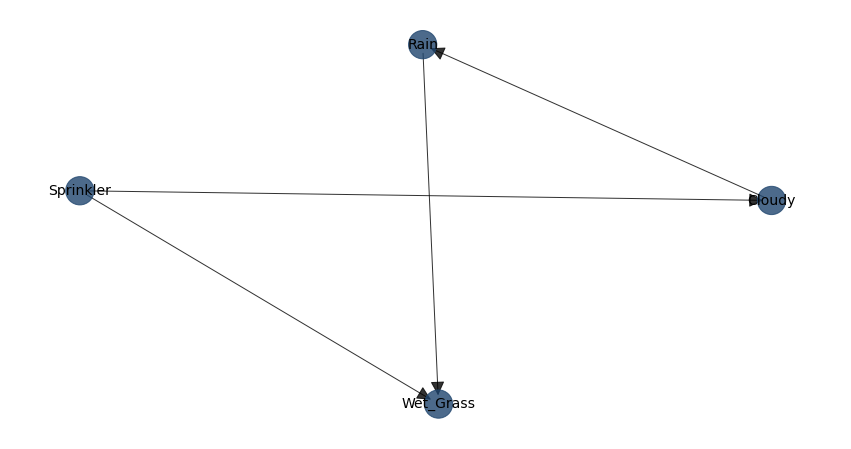

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


In [4]:
# print adjacency matrix
print(DAG['adjmat'])
# target     Cloudy  Sprinkler   Rain  Wet_Grass
# source                                        
# Cloudy      False      False   True      False
# Sprinkler    True      False  False       True
# Rain        False      False  False       True
# Wet_Grass   False      False  False      False

# Plot
G = bn.plot(DAG)

# Interactive plotting
G = bn.plot(DAG, interactive=True)

In [5]:
G = bn.plot(DAG, interactive=True)

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


[bnlearn] >Import dataset..
Index(['Cloudy', 'Sprinkler', 'Rain', 'Wet_Grass'], dtype='object')
[bnlearn] >bayes DAG created.
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


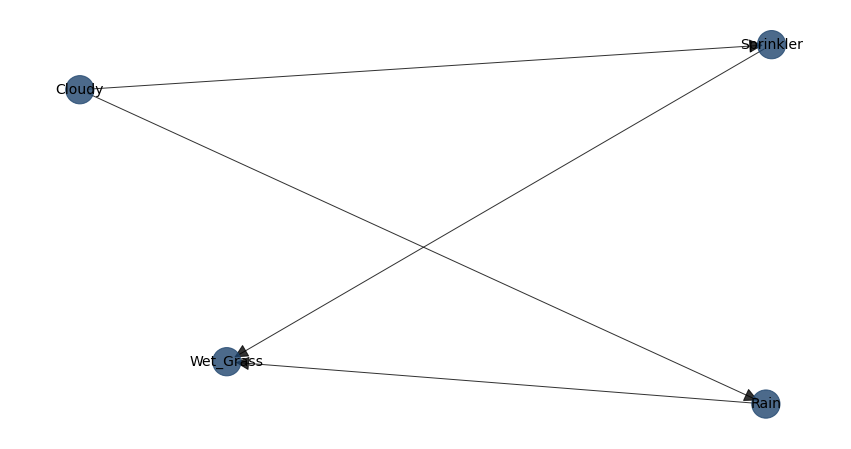

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.488 |
+-----------+-------+
| Cloudy(1) | 0.512 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)  |
+--------------+--------------------+------------+
| Sprinkler(0) | 0.4610655737704918 | 0.91015625 |
+--------------+--------------------+------------+
| Sprinkler(1) | 0.5389344262295082 | 0.08984375 |
+--------------+--------------------+------------+
[bnlearn] >CPD of Rain:
+---------+---------------------+-------------+
| Cloudy  | Cloudy(0)           | Cloudy(1)   |
+---------+---------------------+-------------+
| Rain(0) | 0.8073770491803278  | 0.177734375 |
+---------+---------------------+-------

In [6]:
import bnlearn as bn
# Load sprinkler dataset
df = bn.import_example('sprinkler')
# The edges can be created using the available variables.
print(df.columns)
# ['Cloudy', 'Sprinkler', 'Rain', 'Wet_Grass']

# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]


# Create the DAG
DAG = bn.make_DAG(edges)

# Plot the DAG. This is identical as shown in Figure 3
bn.plot(DAG)

# Print the Conditional probability Tables
bn.print_CPD(DAG)
# [bnlearn] >No CPDs to print. Tip: use bnlearn.plot(DAG) to make a plot.
# This is correct, we did not learn any CPTs yet! We only defined the graph without defining any probabilities.

# Parameter learning on the user-defined DAG and input data using maximumlikelihood
model_mle = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')

# Print the learned CPDs
bn.print_CPD(model_mle)


In [7]:
df

,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


In [15]:
sum(df["Cloudy"]*df["Rain"])

421

In [19]:
421/512

0.822265625

In [18]:
sum(df["Cloudy"])

512